In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob, os

import random

In [19]:
def readLabel(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    user_Id, etc = filename.split('__')
    sexo, mano, dedo, _ = etc.split('_')
    
    sexo = 0 if sexo == 'M' else 1
    mano = 0 if mano =='Left' else 1
    
    if dedo == 'thumb':
        dedo = 0
    elif dedo == 'index':
        dedo = 1
    elif dedo == 'middle':
        dedo = 2
    elif dedo == 'ring':
        dedo = 3
    elif dedo == 'little':
        dedo = 4
        
    return np.array([user_Id, sexo, mano, dedo], dtype=np.uint16)

def readLabelAltered(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    user_Id, etc = filename.split('__')
    sexo, mano, dedo, _, _ = etc.split('_')
    
    sexo = 0 if sexo == 'M' else 1
    mano = 0 if mano =='Left' else 1
    
    if dedo == 'thumb':
        dedo = 0
    elif dedo == 'index':
        dedo = 1
    elif dedo == 'middle':
        dedo = 2
    elif dedo == 'ring':
        dedo = 3
    elif dedo == 'little':
        dedo = 4
        
    return np.array([user_Id, sexo, mano, dedo], dtype=np.uint16)

def readImage(imgToLoad):
    img = np.empty((pixels,pixels), dtype=np.uint8)
    img = cv2.imread(imgToLoad, cv2.IMREAD_GRAYSCALE)
    new_img = img[marginx_1:-marginy_1, marginx_2:-marginy_2]
    img = cv2.resize(new_img, (pixels, pixels))
    lbl = readLabel(imgToLoad)
    return img,lbl

def readImageAltered(imgToLoad):
    img = np.empty((pixels,pixels), dtype=np.uint8)
    img = cv2.imread(imgToLoad, cv2.IMREAD_GRAYSCALE)
    new_img = img[marginx_1:-marginy_1, marginx_2:-marginy_2]
    img = cv2.resize(new_img, (pixels, pixels))
    lbl = readLabelAltered(imgToLoad)
    return img,lbl

def codifyImagesInFolder(pathToFolder,datasetFolder,datasetName):
    img_list = sorted(glob.glob(pathToFolder))
    print('Tenemos ' + str(len(img_list)) + ' imágenes')

    imgs = np.empty((len(img_list), pixels, pixels), dtype=np.uint8)
    labels = np.empty((len(img_list), 4), dtype=np.uint16)

    for i, img_path in enumerate(img_list):
        imgs[i],labels[i] = readImage(img_path)

    np.savez(datasetFolder +'/img_'+datasetName, data = imgs)
    np.save(datasetFolder + '/label_'+datasetName, labels)
    
    return imgs,labels

def codifyImagesInFolderAltered(pathToFolder,datasetFolder,datasetName):
    img_list = sorted(glob.glob(pathToFolder))
    print('Tenemos ' + str(len(img_list)) + ' imágenes')

    imgs = np.empty((len(img_list), pixels, pixels), dtype=np.uint8)
    labels = np.empty((len(img_list), 4), dtype=np.uint16)

    for i, img_path in enumerate(img_list):
        imgs[i],labels[i] = readImageAltered(img_path)

    np.savez(datasetFolder +'/img_'+datasetName, data = imgs)
    np.save(datasetFolder + '/label_'+datasetName, labels)
    
    return imgs,labels

In [15]:
pixels = 90
marginx_1 = 2
marginy_1 = 4
marginx_2 = 2
marginy_2 = 4

In [4]:
datasetFolder = 'dataset_test'

# Leemos una imagen desde la carpeta

In [11]:
imgToLoad = sorted(glob.glob('SOCOFing/Real/3__M_Left_thumb_finger.BMP'))[0]

In [20]:
img,lbl = readImage(imgToLoad)

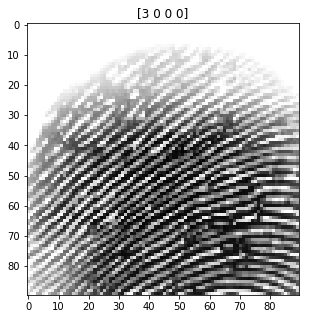

In [21]:
plt.figure(figsize=(5, 5))
plt.title(lbl)
plt.imshow(img, cmap='gray')

# La guardamos en un fichero y la recuperamos

In [25]:
np.savez(datasetFolder +'/img_test', data = img)
np.save(datasetFolder + '/label_test', lbl)

In [27]:
img_load = np.load(datasetFolder + '/img_test.npz')['data']
label_load = np.load(datasetFolder + '/label_test.npy')

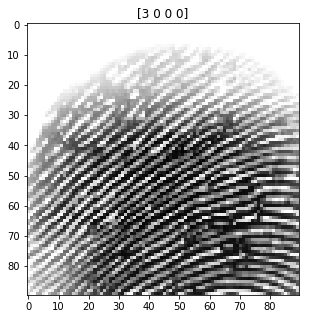

In [28]:
plt.figure(figsize=(5, 5))
plt.title(label_load)
plt.imshow(img_load, cmap='gray')

# Cargamos los datos de una carpeta y los codificamos

In [37]:
dataPath = 'SOCOFing/Real/*.BMP'
datasetFolder = 'dataset_600'
datasetName = 'real'

Tenemos 6000 imágenes


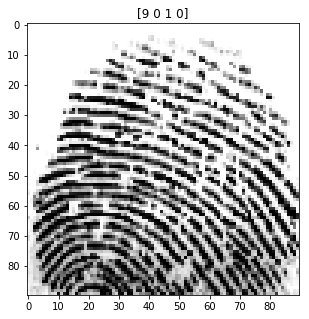

In [38]:
imgs,labels = codifyImagesInFolder(dataPath, datasetFolder,datasetName)

plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [42]:
dataPath = 'SOCOFing/Altered/Altered-Easy/*.BMP'
datasetFolder = 'dataset_600'
datasetName = 'easy'

Tenemos 17931 imágenes


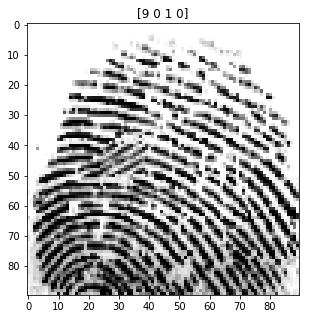

In [43]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [44]:
dataPath = 'SOCOFing/Altered/Altered-Medium/*.BMP'
datasetFolder = 'dataset_600'
datasetName = 'medium'

Tenemos 17067 imágenes


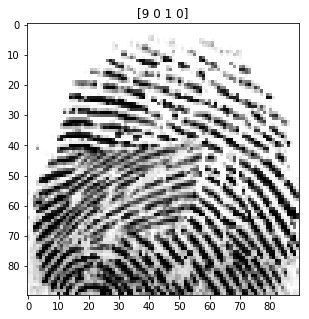

In [45]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [46]:
dataPath = 'SOCOFing/Altered/Altered-Hard/*.BMP'
datasetFolder = 'dataset_600'
datasetName = 'hard'

Tenemos 14272 imágenes


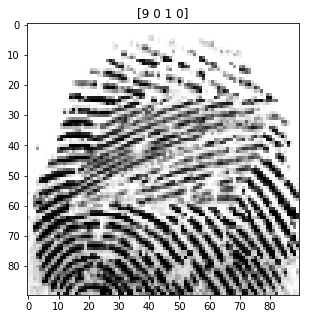

In [47]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

# Creando el dataset de 590

In [48]:
dataPath = 'SOCOFing_590/Real/*.BMP'
datasetFolder = 'dataset_590'
datasetName = 'real'

Tenemos 5900 imágenes


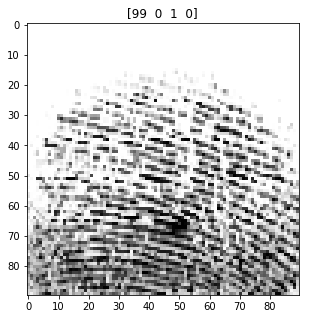

In [49]:
imgs,labels = codifyImagesInFolder(dataPath, datasetFolder,datasetName)

plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [50]:
dataPath = 'SOCOFing_590/Altered/Altered-Easy/*.BMP'
datasetFolder = 'dataset_590'
datasetName = 'easy'

Tenemos 17632 imágenes


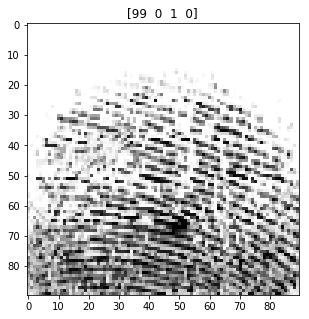

In [51]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [52]:
dataPath = 'SOCOFing_590/Altered/Altered-Medium/*.BMP'
datasetFolder = 'dataset_590'
datasetName = 'medium'

Tenemos 16776 imágenes


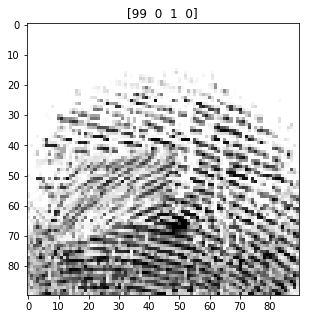

In [53]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [54]:
dataPath = 'SOCOFing_590/Altered/Altered-Hard/*.BMP'
datasetFolder = 'dataset_590'
datasetName = 'hard'

Tenemos 14025 imágenes


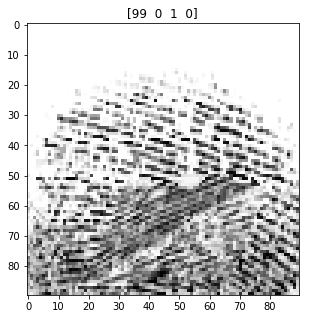

In [55]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

# Creando el dataset de 10

In [56]:
dataPath = 'SOCOFing_10/Real/*.BMP'
datasetFolder = 'dataset_10'
datasetName = 'real'

Tenemos 100 imágenes


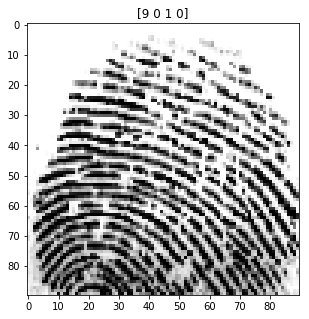

In [57]:
imgs,labels = codifyImagesInFolder(dataPath, datasetFolder,datasetName)

plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [58]:
dataPath = 'SOCOFing_10/Altered/Altered-Easy/*.BMP'
datasetFolder = 'dataset_10'
datasetName = 'easy'

Tenemos 299 imágenes


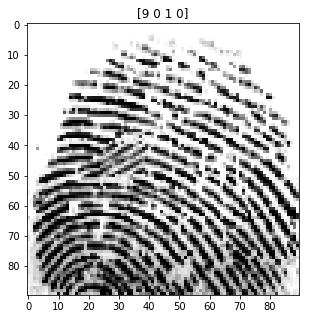

In [59]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [60]:
dataPath = 'SOCOFing_10/Altered/Altered-Medium/*.BMP'
datasetFolder = 'dataset_10'
datasetName = 'medium'

Tenemos 291 imágenes


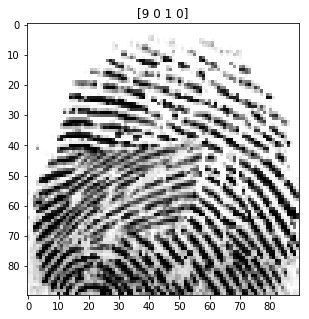

In [61]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')

In [62]:
dataPath = 'SOCOFing_10/Altered/Altered-Hard/*.BMP'
datasetFolder = 'dataset_10'
datasetName = 'hard'

Tenemos 247 imágenes


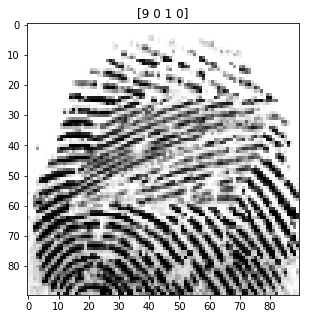

In [63]:
imgs,labels = codifyImagesInFolderAltered(dataPath, datasetFolder,datasetName)
    
plt.figure(figsize=(5, 5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')